<a href="https://colab.research.google.com/github/spradeep97/cv_foundations/blob/master/1_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EECS 504 PS1: Filtering

Pradeep Suresh




# First steps

Run the following code to import the modules that you'll need, and to download the images.

In [0]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, urllib, os
import scipy.ndimage # For image filtering
import imageio # For loading images
import math

# Download the images that you'll need
base_url = 'https://web.eecs.umich.edu/~ahowens/eecs504/w20/psets/ps1/ims'
for name in ['dog-1.jpg', 'dog-2.jpg', 'apple.jpg']:
  with open(name, 'wb') as out:
    url = os.path.join(base_url, name)
    out.write(urllib.request.urlopen(url).read())



# Problem 1.2: Pet edge detection (a)

In [0]:
#Helper Functions

def flip_kernel(h):
    flipped = np.empty_like(h)
    if (flipped.shape[0] != flipped.shape[1]):
        print("ERROR: Trying to flip non-square kernel")
        return -1
    size = flipped.shape[0]
    for row in range(size):
        for col in range(size):
            flipped[row,col] = h[size-row-1, size-col-1]
    return flipped

def pad_image(img, pad_size):
    img_rows = img.shape[0]
    img_cols = img.shape[1]
    padded_rows = int(2 * pad_size + img_rows)
    padded_cols = int(2 * pad_size + img_cols)
    padded = np.zeros([padded_rows,padded_cols], dtype=np.float64)
    start = int(pad_size)
    row_end = int(padded_rows - pad_size)
    col_end = int(padded_cols - pad_size)
    padded[start:row_end, start:col_end] = img
    return padded

def convolve(im,h):
    convolved = np.empty_like(im)
    h = flip_kernel(h)
    (m,n) = im.shape
    (p,q) = h.shape
    padding = (p - 1) / 2
    padded = pad_image(im, padding)
    start = int((p - 1) / 2) #1
    end_row = int(m - start + 2) #101
    end_col = int(n - start + 2) #101
    for row,i in enumerate(range(start,end_row)):
        for col,j in enumerate(range(start,end_col)):
            window = padded[i-1:i+2, j-1:j+2]
            convolved[row,col] = np.sum(np.multiply(window,h))
    return convolved

def visualize(img, title):
    plt.figure()
    plt.title(title)
    plt.axis('off')
    plt.imshow(img, cmap= 'gray')

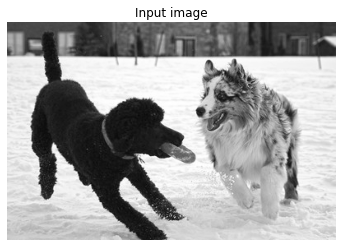

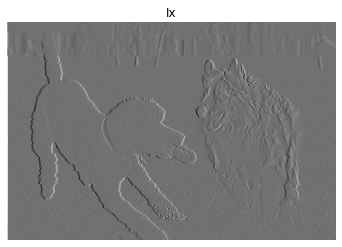

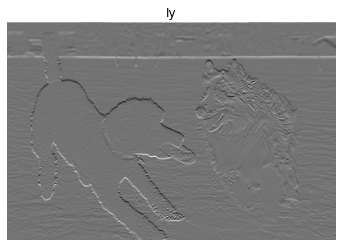

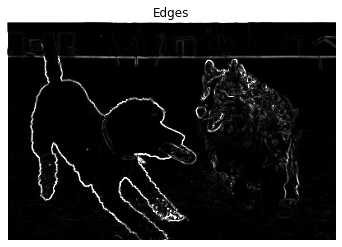

In [0]:
# You can upload images yourself or load them from URLs
im = imageio.imread('dog-1.jpg')
# Convert to grayscale. We'll use floats in [0, 1].
im = im.mean(2)/255.
    
# Convolve the image with horizontal and vertical gradient filters
dx = np.array([[0,0,0],[0,1,-1],[0,0,0]], dtype=np.float64)
dy = np.array([[0,0,0],[0,1,0],[0,-1,0]], dtype=np.float64)
Ix = convolve(im, dx)
Iy = convolve(im, dy)
edges = Ix**2. + Iy**2.

# Visualize edge maps using matplotlib

visualize(im, 'Input image')
visualize(Ix, 'Ix')
visualize(Iy, 'Iy')

plt.figure()
plt.title('Edges')
plt.axis('off')
# Visualize edge responses using this range of values.
plt.imshow(edges,cmap = 'gray', vmin = 0., vmax = np.percentile(edges, 99))


# Problem 1.2: Pet edge detection (c)

In [0]:
# Helper functions

def get_box_filter(size):
    if (int(size)%2 == 0):
        print("Please use filter sizes that are odd.")
        return -1
    filter = (np.ones([int(size),int(size)], dtype=np.float64)) / (size ** 2.)
    return filter

def get_gaussian_filter(size, sigma):
    if (int(size)%2 == 0):
        print("Please use filter sizes that are odd.")
        return -1
    if sigma == 0:
        print("Please use a positive standard deviation")
        return -1
    filter = np.zeros([size,size])
    N = int((size - 1) / 2)
    for row,x in enumerate(range(-N,N+1)):
        for col,y in enumerate(range(-N,N+1)):
            filter[row,col] = math.exp(-(x ** 2. + y ** 2.) / (2*sigma*sigma))
    filter = filter / np.sum(filter)
    return filter

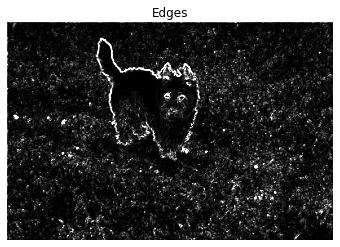

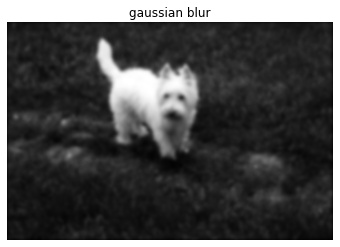

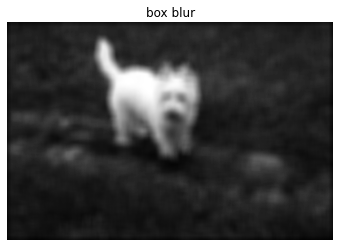

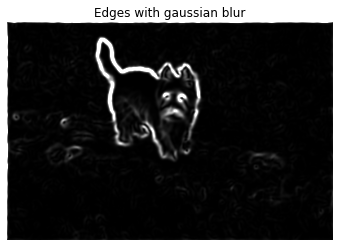

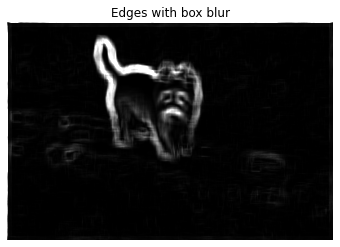

In [0]:
im = imageio.imread('dog-2.jpg').mean(2)/255.

#i) Compute the edges without blurring
Ix = scipy.ndimage.convolve(im, dx, mode='constant', cval=0.0)
Iy = scipy.ndimage.convolve(im, dy, mode='constant', cval=0.0)
edges = Ix**2. + Iy**2.
plt.figure()
plt.title('Edges')
plt.axis('off')
plt.imshow(edges, cmap = 'gray',vmin = 0., vmax = np.percentile(edges, 99))

#ii) Compute the blurred image using 11x11 filter and sigma = 2
gauss_filter = get_gaussian_filter(11,2)
gaussian_blur = scipy.ndimage.convolve(im, gauss_filter, mode='constant', cval=0.0)
plt.figure()
plt.axis('off')
plt.title('gaussian blur')
plt.imshow(gaussian_blur, cmap = 'gray')

#iii) Compute the blurred image using 11x11 box filter
box_filter = get_box_filter(11)
box_blur = scipy.ndimage.convolve(im, box_filter, mode='constant', cval=0.0)
plt.figure()
plt.axis('off')
plt.title('box blur')
plt.imshow(box_blur, cmap = 'gray')

#iv) Compute edges on the two blurred images
gaussian_x = scipy.ndimage.convolve(gaussian_blur, dx, mode='constant', cval=0.0)
gaussian_y = scipy.ndimage.convolve(gaussian_blur, dy, mode='constant', cval=0.0)
edges_gaussian = gaussian_x**2. + gaussian_y**2.
plt.figure()
plt.title('Edges with gaussian blur')
plt.axis('off')
plt.imshow(edges_gaussian, cmap = 'gray',vmin = 0., vmax = np.percentile(edges_gaussian, 99))

box_x = scipy.ndimage.convolve(box_blur, dx, mode='constant', cval=0.0)
box_y = scipy.ndimage.convolve(box_blur, dy, mode='constant', cval=0.0)
edges_box = box_x**2. + box_y**2.
plt.figure()
plt.title('Edges with box blur')
plt.axis('off')
plt.imshow(edges_box, cmap = 'gray', vmin = 0., vmax = np.percentile(edges_box, 99))

# Problem 1.2: Pet edge detection (d)

Please use the visualization code to display the filter you construct.

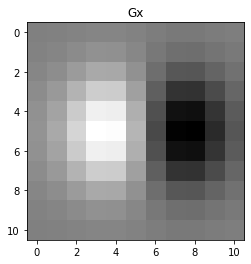

In [0]:
G = get_gaussian_filter(11,2)
B = get_box_filter(11)
x = dx
y = dy
Gx = scipy.ndimage.convolve(G,x, mode='constant', cval=0.0)
Gy = scipy.ndimage.convolve(G,y, mode='constant', cval=0.0)
Bx = scipy.ndimage.convolve(B,x, mode='constant', cval=0.0)
By = scipy.ndimage.convolve(B,x, mode='constant', cval=0.0)

plt.figure()
plt.title('Gx')
plt.imshow(Gx, cmap = 'gray')

# Problem 1.2 Pet edge detection (e)
Please visualize the results using matplotlib.

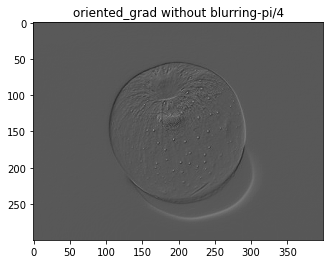

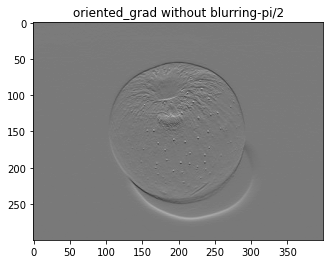

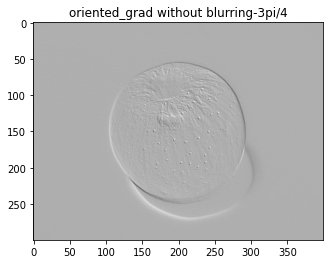

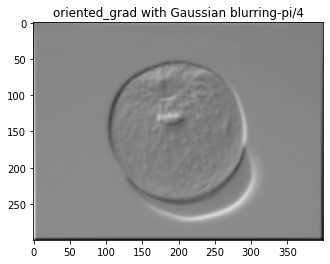

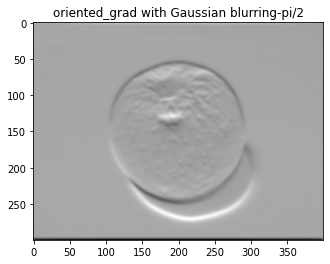

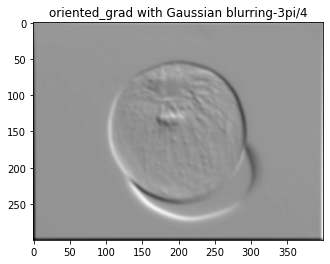

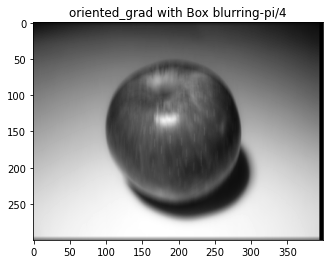

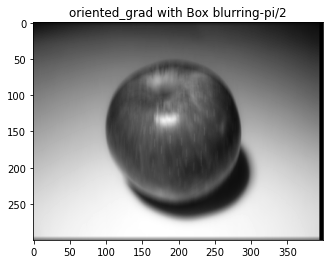

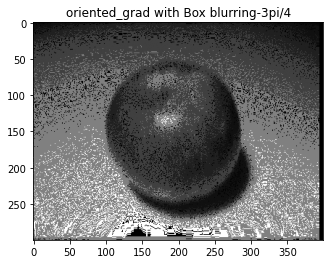

In [0]:
im = imageio.imread('apple.jpg').mean(2)/255.

#1.Write a function oriented_grad()
def oriented_grad(Ix, Iy, theta):
    return (Ix * math.cos(theta) + Iy * math.sin(theta))

def run_test_case(im, x_kernel, y_kernel, title):
    Ix = scipy.ndimage.convolve(im, x_kernel, mode = 'constant', cval=0.0)
    Iy = scipy.ndimage.convolve(im, y_kernel, mode = 'constant', cval=0.0)
    or1 = oriented_grad(Ix,Iy,(math.pi)/4.)
    or2 = oriented_grad(Ix,Iy,(math.pi)/2.)
    or3 = oriented_grad(Ix,Iy,3*(math.pi)/4.)
    
    plt.figure()
    plt.title(title + '-pi/4')
    plt.imshow(or1, cmap = 'gray')

    plt.figure()
    plt.title(title + '-pi/2')
    plt.imshow(or2, cmap = 'gray')

    plt.figure()
    plt.title(title + '-3pi/4')
    plt.imshow(or3, cmap = 'gray')
    
run_test_case(im, dx, dy, 'oriented_grad without blurring')
run_test_case(im, Gx, Gy, 'oriented_grad with Gaussian blurring')
run_test_case(im, Bx, By, 'oriented_grad with Box blurring')